Welcome to the Personalized Fitness Tracker!

Options:
1. Add a workout
2. View summary for the last 7 days
3. Clear workout history
4. Exit
Enter your choice: 1
Available activities: running, cycling, walking, yoga, swimming, weight training
Enter activity: weight training
Enter duration in minutes: 80
Enter your weight in kg: 70
Enter workout date (YYYY-MM-DD) or leave blank for today: 
Workout logged: Weight training, 80 minutes, 588.0 calories burned.


Options:
1. Add a workout
2. View summary for the last 7 days
3. Clear workout history
4. Exit
Enter your choice: 1
Available activities: running, cycling, walking, yoga, swimming, weight training
Enter activity: yoga
Enter duration in minutes: 35
Enter your weight in kg: 70
Enter workout date (YYYY-MM-DD) or leave blank for today: 2024-11-18
Workout logged: Yoga, 35 minutes, 107.19 calories burned.


Options:
1. Add a workout
2. View summary for the last 7 days
3. Clear workout history
4. Exit
Enter your choice: 1
Available activit

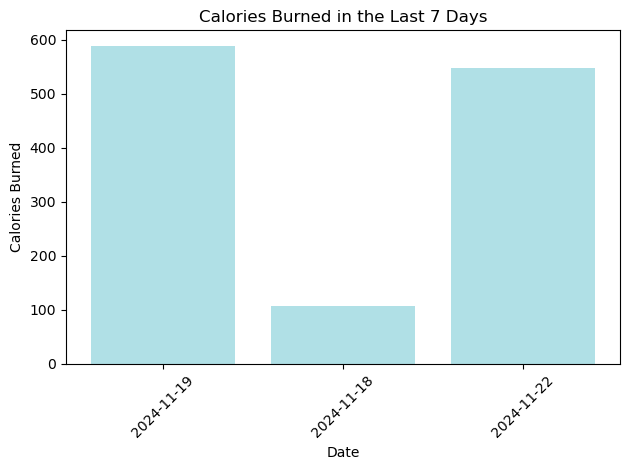


Options:
1. Add a workout
2. View summary for the last 7 days
3. Clear workout history
4. Exit
Enter your choice: 4
Exiting. Stay fit!


In [8]:
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# MET values for activities
met_values = {
    "running": 9.8,       # MET for running
    "cycling": 7.5,       # MET for cycling
    "walking": 3.8,       # MET for walking
    "yoga": 2.5,          # MET for yoga
    "swimming": 8.0,      # MET for swimming
    "weight training": 6.0  # MET for moderate weight training
}

# File to store workout data
data_file = "fitness_data.json"

def load_data():
    try:
        with open(data_file, "r") as file:
            return json.load(file)
    except FileNotFoundError:
        return []

def save_data(data):
    with open(data_file, "w") as file:
        json.dump(data, file, indent=4)

def calculate_calories(met, duration, weight):
    return round((met * 3.5 * weight / 200) * duration, 2)

def add_workout():
    print("Available activities:", ", ".join(met_values.keys()))
    activity = input("Enter activity: ").lower()
    if activity not in met_values:
        print("Invalid activity! Please try again.")
        return

    try:
        duration = int(input("Enter duration in minutes: "))
        weight = float(input("Enter your weight in kg: "))
        date_str = input("Enter workout date (YYYY-MM-DD) or leave blank for today: ")
        date = datetime.strptime(date_str, "%Y-%m-%d") if date_str else datetime.now()
    except ValueError:
        print("Invalid input! Please try again.")
        return

    calories = calculate_calories(met_values[activity], duration, weight)
    workout = {
        "date": date.strftime("%Y-%m-%d"),
        "activity": activity,
        "duration": duration,
        "weight": weight,
        "calories": calories
    }
    data = load_data()
    data.append(workout)
    save_data(data)

    print(f"Workout logged: {activity.capitalize()}, {duration} minutes, {calories} calories burned.\n")

def view_summary():
    data = load_data()
    if not data:
        print("No workout data available!")
        return

    # Filter last 7 days
    last_7_days = datetime.now() - timedelta(days=7)
    recent_workouts = [w for w in data if datetime.strptime(w["date"], "%Y-%m-%d") >= last_7_days]

    if not recent_workouts:
        print("No workouts in the last 7 days!")
        return

    total_time = sum(w["duration"] for w in recent_workouts)
    total_calories = sum(w["calories"] for w in recent_workouts)
    print(f"\nSummary for the last 7 days:")
    print(f"Total workout time: {total_time} minutes")
    print(f"Total calories burned: {total_calories} calories")

    # Visualize data
    dates = [w["date"] for w in recent_workouts]
    calories = [w["calories"] for w in recent_workouts]

    plt.bar(dates, calories, color="powderblue")
    plt.xlabel("Date")
    plt.ylabel("Calories Burned")
    plt.title("Calories Burned in the Last 7 Days")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def clear_history():
    confirm = input("Are you sure you want to clear all workout data? (yes/no): ").lower()
    if confirm == "yes":
        save_data([])  # Overwrite the file with an empty list
        print("All workout data has been cleared!")
    else:
        print("Clear history operation canceled.")

def main():
    print("Welcome to the Personalized Fitness Tracker!")
    while True:
        print("\nOptions:")
        print("1. Add a workout")
        print("2. View summary for the last 7 days")
        print("3. Clear workout history")
        print("4. Exit")
        choice = input("Enter your choice: ")

        if choice == "1":
            add_workout()
        elif choice == "2":
            view_summary()
        elif choice == "3":
            clear_history()
        elif choice == "4":
            print("Exiting. Stay fit!")
            break
        else:
            print("Invalid choice. Please try again.")

# Run the program
if __name__ == "__main__":
    main()
